# Solar Orbiter EPD Data Loader (solo-epd-loader) <a class="anchor" id="Solar_Orbiter_EPD"></a>
---

## Table of Contents

* [1. General information](#General)
* [2. Example with different viewing directions of EPT electrons](#Solar_Orbiter_EPT_viewing)
    * [Optionally: Save individual datasets as ASCII files](#ascii_export)
* [3. Example with different energy channels for EPT electrons and ions](#Solar_Orbiter_EPT)
* [4. Example with EPT and HET data](#Solar_Orbiter_EPT_HET)
* [5. Example with EPT and STEP data](#Solar_Orbiter_EPT_STEP)
* [6. Example using low latency data](#Solar_Orbiter_LL)
---

### 1. General information <a class="anchor" id="General"></a>

- GitHub: https://github.com/jgieseler/solo-epd-loader
- PyPI: https://pypi.org/project/solo-epd-loader
- conda: https://anaconda.org/conda-forge/solo-epd-loader

Python data loader for Solar Orbiter's (SolO) [Energetic Particle Detector (EPD)](http://espada.uah.es/epd/) provided through the [SERPENTINE project](https://serpentine-h2020.eu). At the moment provides level 2 (l2) and low latency (ll) data ([more details on data levels here](http://espada.uah.es/epd/EPD_data_overview.php)) obtained through CDF files from ESA's [Solar Orbiter Archive (SOAR)](http://soar.esac.esa.int/soar) for the following sensors:

- Electron Proton Telescope (EPT)
- High Energy Telescope (HET)
- SupraThermal Electrons and Protons (STEP)

**Current caveats:**

- Only the standard ``rates`` data products are supported (i.e., no ``burst`` or ``high cadence`` data).
- Only electrons, protons and alpha particles are processed (i.e., for HET, He3, He4, C, N, O, Fe are omitted at the moment).
- For STEP, the sectored data is not yet available, and data is only available until Oct 2021 due to the change of the data product (will be updated soon).
- The Suprathermal Ion Spectrograph (SIS) is not yet included.

#### Local installation

In order to run it locally on your computer, you need to install `solo-epd-loader` via pip:
``` bash
$ pip install solo-epd-loader
```

or via conda:
``` bash
$ conda install -c conda-forge solo-epd-loader
```

#### Input parameters

-  ``sensor``: ``'ept'``, ``'het'``, or ``'step'`` (string)
-  ``level``: ``'ll'`` or ``'l2'`` (string)
-  ``startdate``, ``enddate``: Datetime object (e.g., ``dt.date(2021,12,31)`` or ``dt.datetime(2021,4,15)``) or integer of the form yyyymmdd with empty positions filled with zeros, e.g. ``20210415`` (if no ``enddate`` is provided, ``enddate = startdate`` will be used)
-  ``viewing``: ``'sun'``, ``'asun'``, ``'north'``, ``'south'`` (string) or ``None``; not
   needed for ``sensor = 'step'``
-  ``path``: directory in which Solar Orbiter data is/should be
   organized; e.g. ``'/home/userxyz/solo/data/'`` (string). See section [Data folder structure](https://github.com/jgieseler/solo-epd-loader#data-folder-structure) in the documentation for more details.
-  ``autodownload``: if ``True`` will try to download missing data files
   from SOAR (bolean)

#### Importing and general settings

In [1]:
import datetime as dt
import numpy as np
import os
import pandas as pd
import warnings
from matplotlib import pyplot as plt
from solo_epd_loader import epd_load

# omit Pandas' PerformanceWarning
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

#### Define some general options:

In [2]:
# set your local path where you want to save the data files:
path = f"{os.getcwd()}/data/"

# whether missing data files should automatically downloaded from SOAR:
autodownload = True

# define some optional plotting settings
color = {'sun': 'crimson', 'asun': 'orange', 'north': 'darkslateblue', 'south': 'c'}

---
### 2. Example with different viewing directions of EPT electrons <a class="anchor" id="Solar_Orbiter_EPT_viewing"></a>



Define some basic options:

In [4]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2020, 12, 10)
enddate = dt.datetime(2020, 12, 11)

# define the sensor to use:
sensor = 'ept'

# define data level to use ('l2' or 'll'):
level = 'l2'

Obtain the data, downloading them to `path` if needed:

In [5]:
# load data
df_protons_sun, df_electrons_sun, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                      enddate=enddate, viewing='sun',
                                                      path=path, autodownload=True)
df_protons_asun, df_electrons_asun, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                        enddate=enddate, viewing='asun',
                                                        path=path, autodownload=True)
df_protons_south, df_electrons_south, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='south',
                                                          path=path, autodownload=True)
df_protons_north, df_electrons_north, energies = epd_load(sensor=sensor, level=level, startdate=startdate,
                                                          enddate=enddate, viewing='north',
                                                          path=path, autodownload=True)

Get info on energy channels:

In [6]:
energies

{'Ion_Bins_Text': array([['0.0485 - 0.0548 MeV'],
        ['0.0511 - 0.0580 MeV'],
        ['0.0548 - 0.0602 MeV'],
        ['0.0580 - 0.0637 MeV'],
        ['0.0602 - 0.0674 MeV'],
        ['0.0637 - 0.0695 MeV'],
        ['0.0695 - 0.0735 MeV'],
        ['0.0735 - 0.0775 MeV'],
        ['0.0775 - 0.0812 MeV'],
        ['0.0812 - 0.0862 MeV'],
        ['0.0862 - 0.0909 MeV'],
        ['0.0909 - 0.0967 MeV'],
        ['0.0967 - 0.1023 MeV'],
        ['0.1023 - 0.1090 MeV'],
        ['0.1090 - 0.1164 MeV'],
        ['0.1164 - 0.1240 MeV'],
        ['0.1240 - 0.1324 MeV'],
        ['0.1324 - 0.1419 MeV'],
        ['0.1419 - 0.1513 MeV'],
        ['0.1513 - 0.1627 MeV'],
        ['0.1627 - 0.1741 MeV'],
        ['0.1741 - 0.1875 MeV'],
        ['0.1875 - 0.2029 MeV'],
        ['0.2029 - 0.2183 MeV'],
        ['0.2183 - 0.2357 MeV'],
        ['0.2357 - 0.2541 MeV'],
        ['0.2541 - 0.2746 MeV'],
        ['0.2746 - 0.2981 MeV'],
        ['0.2981 - 0.3215 MeV'],
        ['0.3215 - 0.3491 

Make the plot:

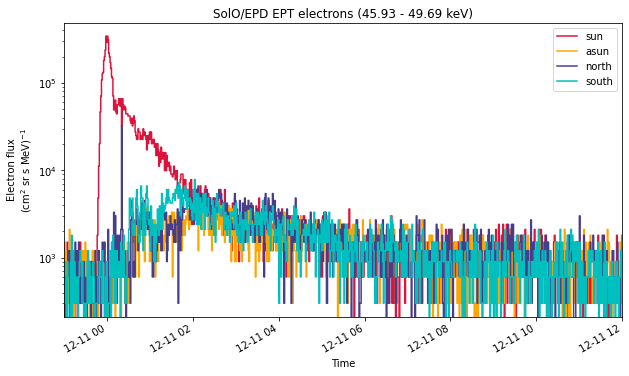

In [7]:
# energy channel to use; cf. "energies" for the energies
channel = 6

fig, ax = plt.subplots(figsize=(10, 6))
ax = df_electrons_sun['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='sun', 
                                                                        color=color['sun'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_asun['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='asun', 
                                                                        color=color['asun'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_north['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='north', 
                                                                        color=color['north'],
                                                                        drawstyle="steps-mid")
ax = df_electrons_south['Electron_Flux'][f'Electron_Flux_{channel}'].plot(logy=True, label='south', 
                                                                        color=color['south'],
                                                                        drawstyle="steps-mid")

ax.set_xlim([dt.datetime(2020, 12, 10, 23, 0), dt.datetime(2020, 12, 11, 12, 0)])

ax.set_ylabel("Electron flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
ax.set_title(f"SolO/EPD EPT electrons ({1000*energies['Electron_Bins_Low_Energy'][channel]:.2f}"
             + f" - {1000*energies['Electron_Bins_Low_Energy'][channel+1]:.2f} keV)")
ax.legend()

#### Optionally: Save individual datasets as ASCII files<a class="anchor" id="ascii_export"></a>
In case you want to export some of the obtained data as a ASCII file, e.g., to further use it in some other analysis, this is possible on a per-dataset base. The following cell will export the Pandas DataFrame containing the sun-viewing electron measurements of EPT, which has been read in above, to a comma separared ASCII file (csv) in the directory next to this notebook file.

In [8]:
# Define the full path where to save the csv file. Either just provide the 
# file name that will be saved next to the notebook, or a full path, e.g.
# '/home/user/data/ept_electrons.csv'
full_ascii_path = 'ept_electrons.csv'

# Saving specific Dataframe. Needs to be done for each individual Dataframe!
df_electrons_sun.to_csv(full_ascii_path)

print('File saved to ' + full_ascii_path)

File saved to ept_electrons.csv


---
### 3. Example with different energy channels for EPT electrons and ions <a class="anchor" id="Solar_Orbiter_EPT"></a>



Define some basic options:

In [9]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2020, 7, 8)
enddate = dt.datetime(2020, 7, 24)

# change time resolution to get smoother curve
resample = '60min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed:

In [10]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

Get info on energy channels:

In [11]:
energies_ept

{'Ion_Bins_Text': array([['0.0485 - 0.0548 MeV'],
        ['0.0511 - 0.0580 MeV'],
        ['0.0548 - 0.0602 MeV'],
        ['0.0580 - 0.0637 MeV'],
        ['0.0602 - 0.0674 MeV'],
        ['0.0637 - 0.0695 MeV'],
        ['0.0695 - 0.0735 MeV'],
        ['0.0735 - 0.0775 MeV'],
        ['0.0775 - 0.0812 MeV'],
        ['0.0812 - 0.0862 MeV'],
        ['0.0862 - 0.0909 MeV'],
        ['0.0909 - 0.0967 MeV'],
        ['0.0967 - 0.1023 MeV'],
        ['0.1023 - 0.1090 MeV'],
        ['0.1090 - 0.1164 MeV'],
        ['0.1164 - 0.1240 MeV'],
        ['0.1240 - 0.1324 MeV'],
        ['0.1324 - 0.1419 MeV'],
        ['0.1419 - 0.1513 MeV'],
        ['0.1513 - 0.1627 MeV'],
        ['0.1627 - 0.1741 MeV'],
        ['0.1741 - 0.1875 MeV'],
        ['0.1875 - 0.2029 MeV'],
        ['0.2029 - 0.2183 MeV'],
        ['0.2183 - 0.2357 MeV'],
        ['0.2357 - 0.2541 MeV'],
        ['0.2541 - 0.2746 MeV'],
        ['0.2746 - 0.2981 MeV'],
        ['0.2981 - 0.3215 MeV'],
        ['0.3215 - 0.3491 

Make the plot:

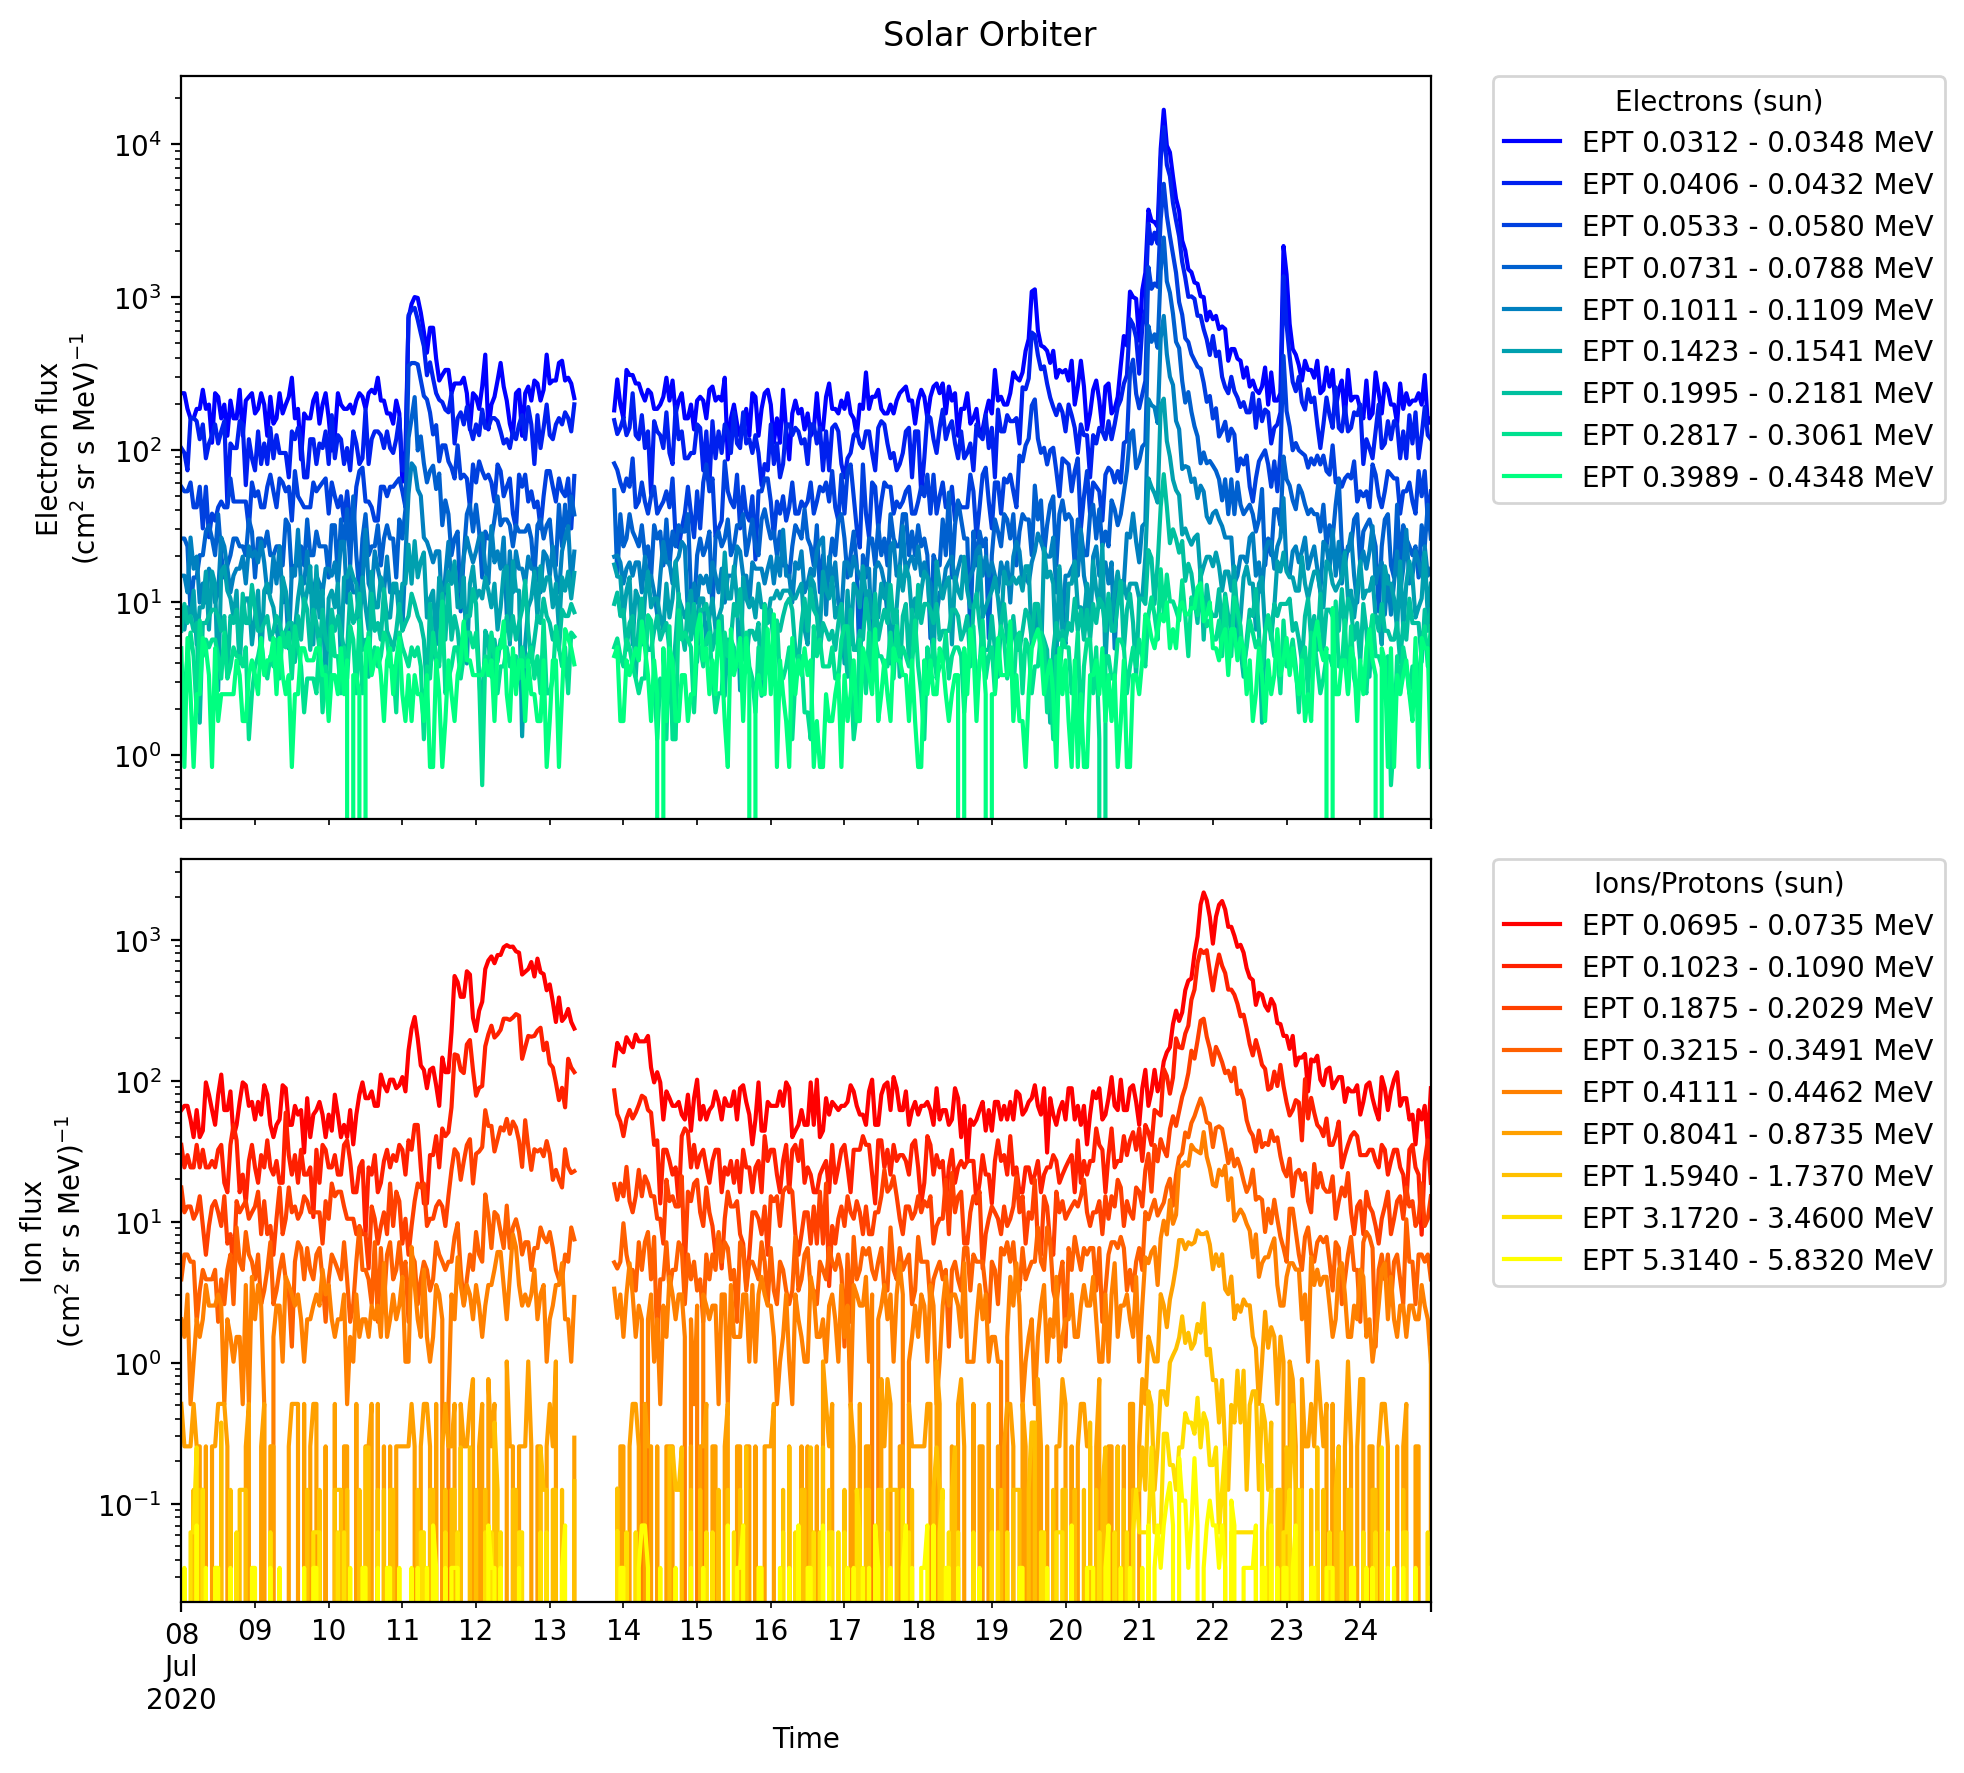

In [12]:
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 9), dpi=200)

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,9)), i.e. in 9 parts
axs[0].set_prop_cycle('color', plt.cm.winter(np.linspace(0,1,9)))
# plot selection of ept electron channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_electrons_ept['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Electron_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,9)), i.e. in 9 parts
axs[1].set_prop_cycle('color', plt.cm.autumn(np.linspace(0,1,9)))
# plot selection of ept ion channels
for channel in [6, 13, 22, 29, 32, 40, 48, 56, 62]:
    df_protons_ept['Ion_Flux'][f'Ion_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Ion_Bins_Text"][channel][0])

axs[0].set_ylabel("Electron flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[1].set_ylabel("Ion flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Electrons ({viewing})')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Ions/Protons ({viewing})')
fig.suptitle('Solar Orbiter')
plt.subplots_adjust(hspace=0)
plt.tight_layout()

---
### 4. Example with EPT and HET data <a class="anchor" id="Solar_Orbiter_EPT_HET"></a>



Define some basic options:

In [13]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2021, 10, 28)
enddate = dt.datetime(2021, 10, 29)

# change time resolution to get smoother curve
resample = '10min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed:

In [14]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

# load het sun viewing data
df_protons_het, df_electrons_het, energies_het = epd_load(sensor='het', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

Make plot:

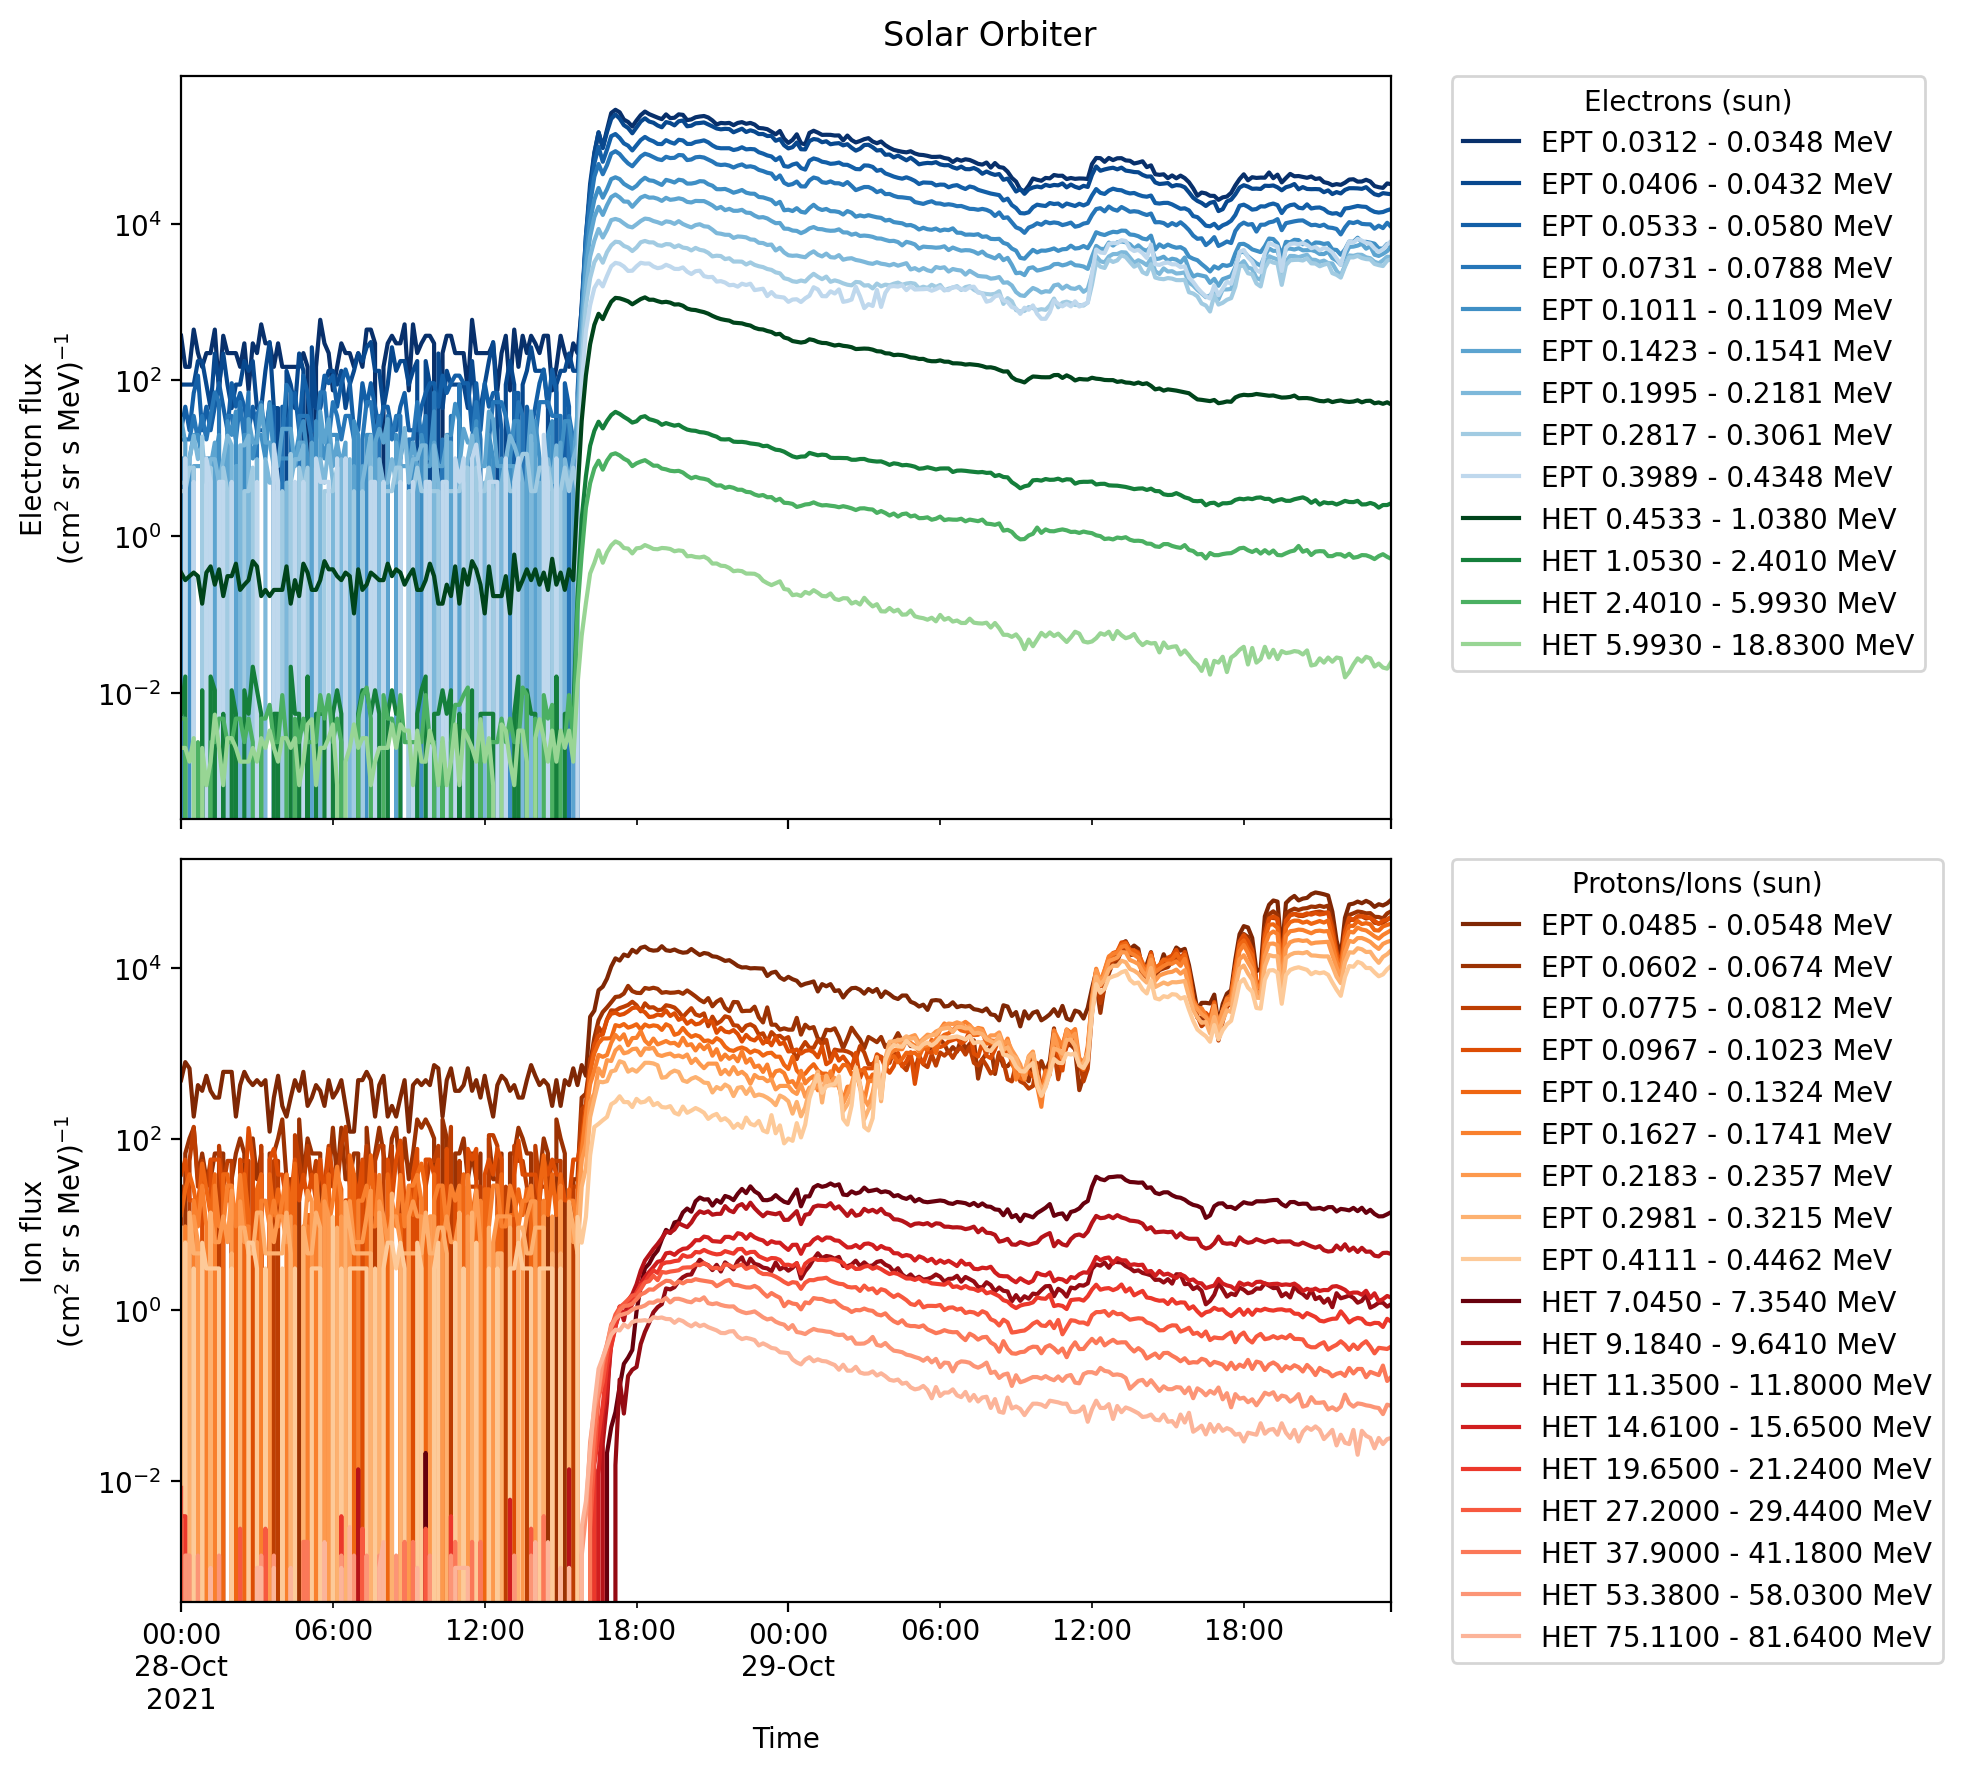

In [15]:
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 9), dpi=200)


# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[0].set_prop_cycle('color', plt.cm.Blues_r(np.linspace(0,1,12)))
# plot selection of ept electron channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_electrons_ept['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Electron_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,6)), i.e. in 6 parts
axs[0].set_prop_cycle('color', plt.cm.Greens_r(np.linspace(0,1,6)))
# plot selection of het electron channels
for channel in [0, 1, 2, 3]:
    df_electrons_het['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='HET '+energies_het["Electron_Bins_Text"][channel][0])


# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[1].set_prop_cycle('color', plt.cm.Oranges_r(np.linspace(0,1,12)))
# plot selection of ept ion channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_protons_ept['Ion_Flux'][f'Ion_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Ion_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[1].set_prop_cycle('color', plt.cm.Reds_r(np.linspace(0,1,12)))
# plot selection of het ion channels
for channel in [0, 4, 8, 12, 16, 20, 24, 28, 32]:
    df_protons_het['H_Flux'][f'H_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='HET '+energies_het["H_Bins_Text"][channel][0])

axs[0].set_ylabel("Electron flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[1].set_ylabel("Ion flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Electrons ({viewing})')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Protons/Ions ({viewing})')
fig.suptitle('Solar Orbiter')
plt.subplots_adjust(hspace=0)
plt.tight_layout()

---
### 5. Example with EPT and STEP data <a class="anchor" id="Solar_Orbiter_EPT_STEP"></a>



Define some basic options:

In [16]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2020, 7, 8)
enddate = dt.datetime(2020, 7, 24)

# change time resolution to get smoother curve
resample = '60min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed:

In [17]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='l2', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

# load step data
df_step, energies_step = epd_load(sensor='step', level='l2', 
                                  startdate=startdate, enddate=enddate,
                                  path=path, autodownload=autodownload)

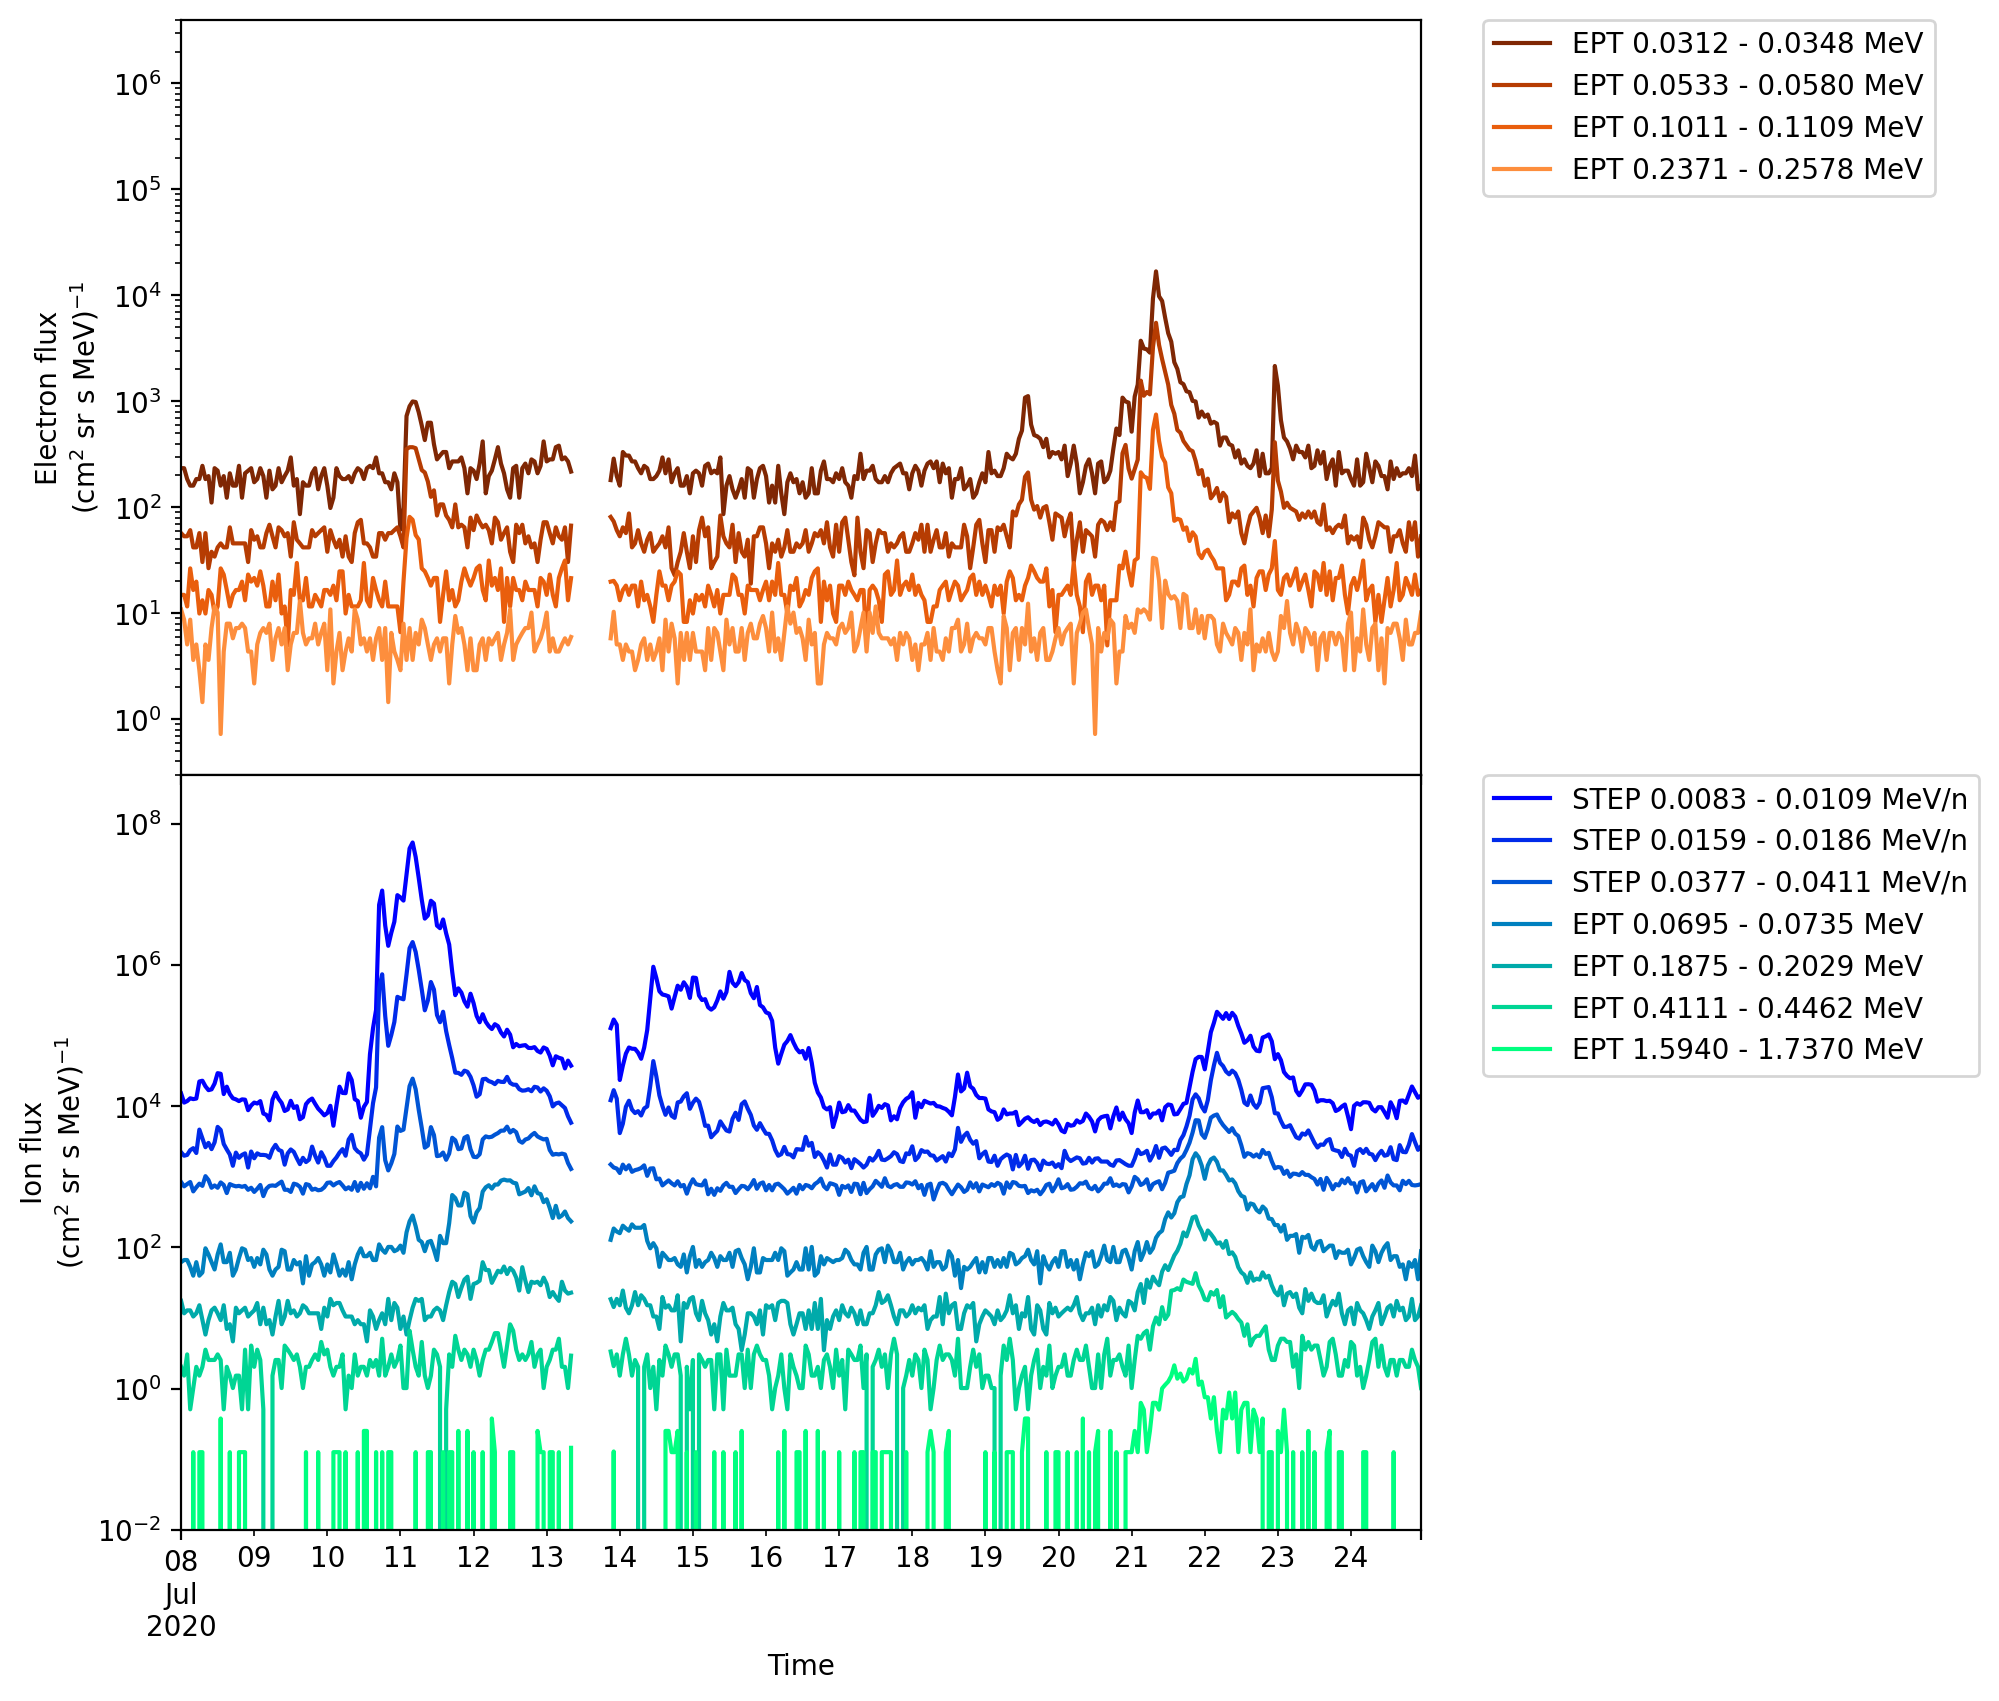

In [18]:
fig, axs = plt.subplots(2, sharex=True, figsize=(8, 10), dpi=200)
axs[0].set_prop_cycle('color', plt.cm.Oranges_r(np.linspace(0,1,7)))
axs[1].set_prop_cycle('color', plt.cm.winter(np.linspace(0,1,7)))

# plot selection of ept electron channels
for channel in [0, 8, 16, 26]:
    df_electrons_ept['Electron_Flux'][f'Electron_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Electron_Bins_Text"][channel][0])

# plot selection of step ion channels
for channel in [8, 17, 33]:
    df_step['Magnet_Flux'][channel].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='STEP '+energies_step["Bins_Text"][channel][0])

# plot selection of ept ion channels
for channel in [6, 22, 32, 48]:
    df_protons_ept['Ion_Flux'][f'Ion_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Ion_Bins_Text"][channel][0])

axs[0].set_ylim([0.3, 4e6])
axs[1].set_ylim([0.01, 5e8])

axs[0].set_ylabel("Electron flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[1].set_ylabel("Ion flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.subplots_adjust(hspace=0)

---
### 6. Example using low latency data <a class="anchor" id="Solar_Orbiter_LL"></a>



Low latency data available from SOAR provides access to the latest observations, but is not verified and should thus not be used for final analysis like publications! 

Be also aware that some of the keys (i.e., column names) of the returned DataFrames are different for level 2 and low latency data, so you need e.g. to adjust the code for plotting the data a bit.

Let's redo [Example 4 with EPT and HET data](#Solar_Orbiter_EPT_HET), using now low latency data of a very recent event.

Define some basic options:

In [19]:
# define start and end date of data to load (year, month, day):
startdate = dt.datetime(2022, 9, 5)
enddate = dt.datetime(2022, 9, 7)

# change time resolution to get smoother curve
resample = '10min' 

# define viewing direction of telescope (for EPT & HET)
viewing = 'sun'

Obtain the data, downloading them to `path` if needed. Note that we set `level` here to `'ll'`!

In [20]:
# load ept sun viewing data
df_protons_ept, df_electrons_ept, energies_ept = epd_load(sensor='ept', level='ll', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

# load het sun viewing data
df_protons_het, df_electrons_het, energies_het = epd_load(sensor='het', level='ll', 
                                                          startdate=startdate, enddate=enddate, 
                                                          viewing=viewing, 
                                                          path=path, autodownload=autodownload)

Make plot. Note that compared to the previous example some keys have changed!

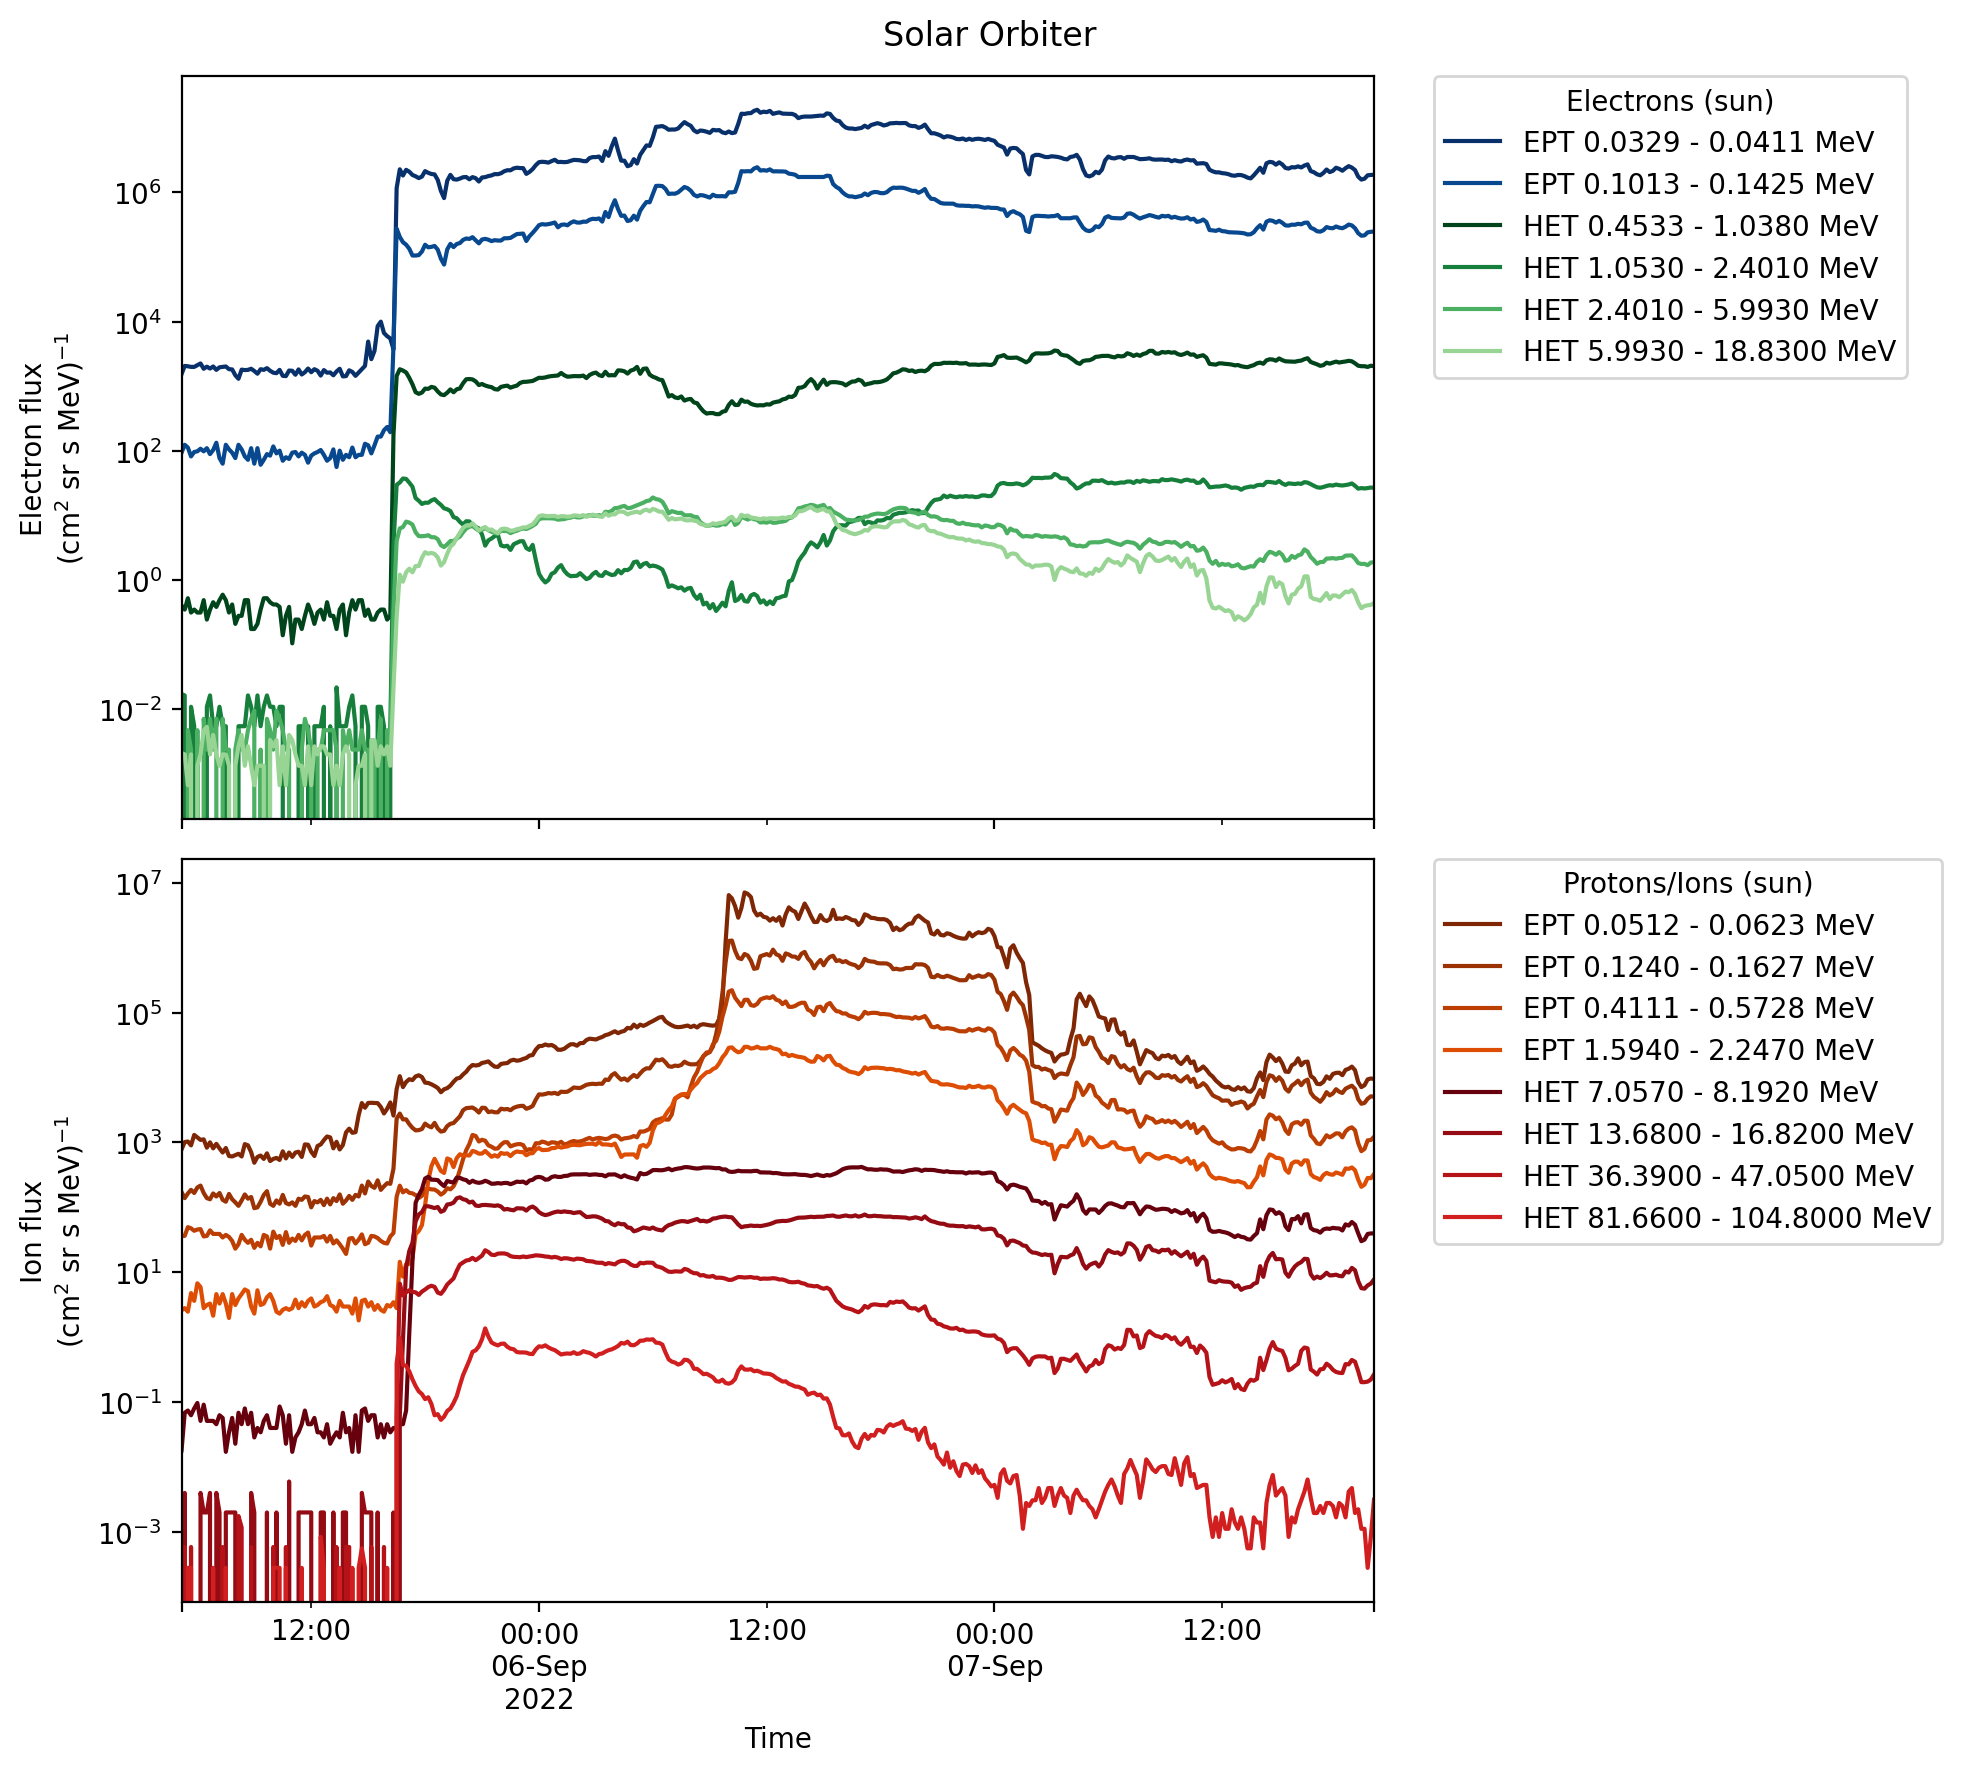

In [21]:
fig, axs = plt.subplots(2, sharex=True, figsize=(10, 9), dpi=200)


# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[0].set_prop_cycle('color', plt.cm.Blues_r(np.linspace(0,1,12)))
# plot selection of ept electron channels
for channel in [0, 4]:
    df_electrons_ept['Electron_Flux'][f'Ele_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='EPT '+energies_ept["Ele_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,6)), i.e. in 6 parts
axs[0].set_prop_cycle('color', plt.cm.Greens_r(np.linspace(0,1,6)))
# plot selection of het electron channels
for channel in [0, 1, 2, 3]:
    df_electrons_het['Electron_Flux'][f'Ele_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[0], logy=True, label='HET '+energies_het["Ele_Bins_Text"][channel][0])


# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[1].set_prop_cycle('color', plt.cm.Oranges_r(np.linspace(0,1,12)))
# plot selection of ept ion channels
for channel in [0, 4, 8, 12]:
    df_protons_ept['Ion_Flux'][f'Prot_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='EPT '+energies_ept["Prot_Bins_Text"][channel][0])

# Make list of gradually changing colors. Use a maplotlib 
# colormap (cm) and divide it with np.linspace(0,1,12)), i.e. in 12 parts
axs[1].set_prop_cycle('color', plt.cm.Reds_r(np.linspace(0,1,12)))
# plot selection of het ion channels
for channel in [0, 4, 8, 11]:
    df_protons_het['H_Flux'][f'H_Flux_{channel}'].resample(resample).mean().plot(
      ax = axs[1], logy=True, label='HET '+energies_het["H_Bins_Text"][channel][0])

axs[0].set_ylabel("Electron flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[1].set_ylabel("Ion flux\n"+r"(cm$^2$ sr s MeV)$^{-1}$")
axs[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Electrons ({viewing})')
axs[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=f'Protons/Ions ({viewing})')
fig.suptitle('Solar Orbiter')
plt.subplots_adjust(hspace=0)
plt.tight_layout()